In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg

# Eigenvalues/Eigenvectors

Vectors acted on by a transformation tend to rotate.  Here's an example.

In [23]:
A=np.zeros((2,2))
A[0,0]=1.
A[0,1]=2.
A[1,0]=2.
A[1,1]=5.
x0=np.array([1,0])
x1=A.dot(x0)

(-0.1, 2.5)

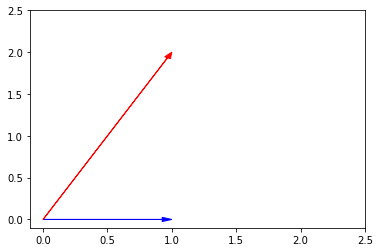

In [24]:
origin = np.array([0., 0.])
plt.arrow(origin[0], origin[1], x0[0], x0[1], head_width=0.05, color='blue',length_includes_head=True)
plt.arrow(origin[0], origin[1], x1[0], x1[1], head_width=0.05, color='red',length_includes_head=True)
plt.xlim((-0.1, 2.5))
plt.ylim((-0.1, 2.5))

However, transforming an eigenvector doesn't change its direction, only its length.

In [25]:
w,v=linalg.eig(A)
print w
print v

[0.17157288 5.82842712]
[[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]]


In [30]:
y0=v[:,0]
z0=v[:,1]
y1=A.dot(y0)
z1=A.dot(z0)

(-5.5, 1)

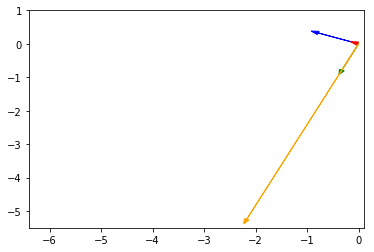

In [40]:
plt.arrow(origin[0], origin[1], y0[0], y0[1], head_width=0.1, color='blue',length_includes_head=True)
plt.arrow(origin[0], origin[1], y1[0], y1[1], head_width=0.1, color='red',length_includes_head=True)
plt.arrow(origin[0], origin[1], z0[0], z0[1], head_width=0.1, color='green',length_includes_head=True)
plt.arrow(origin[0], origin[1], z1[0], z1[1], head_width=0.1, color='orange',length_includes_head=True)
plt.xlim((-6.4,0.1))
plt.ylim((-5.5,1))

The matrix of right eigenvectors is given in the matrix $\mathbf{V}$.  The left eigenvectors are $\mathbf{V}^T$, with $\mathbf{V}$ being orthogonal.

In [41]:
np.dot(v,v.T)

array([[ 1.00000000e+00, -2.58605321e-17],
       [-2.58605321e-17,  1.00000000e+00]])

This symmetric matrix is positive-definite, which we know because all the eigenvaues are positive.  Many matrices in physics and statistics are positive-definite, including the moment of inertia, the Hamiltonian, and the covariance matrix.

Note that for nonsymmetric matrices, such as the rotation matrix, the eigenvalues and eigenvectors can be complex.

In [43]:
R=np.array([[1.,-1.],[1.,1.]])/np.sqrt(2.)# 45 deg rotation matrix
w,v=linalg.eig(R)
print w
print v

[0.70710678+0.70710678j 0.70710678-0.70710678j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


It's more illuminating in exponential form.  The eigenvalues are $e^{\pm i\pi/4}$ and the eigenvectors are $(1,\mp i)/\sqrt{2}$ .

# Spring Problem

In lecture we derived that the solution for the wave equation for a "springy" string $$-\rho(x)\frac{\partial^2u}{\partial t^2}+\frac{\partial}{\partial x}\left[p(x)\frac{\partial u}{\partial x}\right]-q(x)u(x,t)=0$$ can be written using separation of variables as $$u(x,t)=\sum_kw_k(x)v_k(t)\, .$$ In this case, $$v_k(t)=a_k\cos(\omega_kt)+b_k\sin(\omega_kt)$$ and the differential equation for $w(x)$ can be converted using the finite-difference method into the eigenvalue problem $\mathbf{M}\cdot\mathbf{w}=\omega^2\mathbf{w}$, where over the 1D grid $x_i=ih,\,\{i=1,N\}$, $\mathbf{w}=\{w(x_1),w(x_2),...,w(x_N)\}$.  Defining $Z_i=Z(x_i)$ for quantities $\rho(x)$, $q(x)$, and $p(x)$, the matrix $\mathbf{M}$ is given by $$\mathbf{M}=\frac{1}{h^2}\left(\begin{array}{cccccc}\frac{p_{1/2}+p_{3/2}+h^2q_1}{\rho_1}&\frac{-p_{3/2}}{\rho_1}&0&...&...&0\\\frac{-p_{3/2}}{\rho_2}&\frac{p_{3/2}+p_{5/2}+h^2q_2}{\rho_2}&\frac{-p_{5/2}}{\rho_2}&0&...&0\\0&\frac{-p_{5/2}}{\rho_3}&\frac{p_{5/2}+p_{7/2}+h^2q_3}{\rho_3}&\frac{-p_{7/2}}{\rho_3}&0&...\\...&...&...&...&...&...\\0&0&0&0&\frac{-p_{N-1/2}}{\rho_N}&\frac{p_{N-1/2}+p_{N+1/2}+h^2q_N}{\rho_N}\end{array}\right)\, .$$  In this section we will solve this to get the eigenvalues $\omega_k^2$ and the eigenvectors $\mathbf{w}_k$ for various physical cases.

First we start with the case where there is no springiness, $q=0$, and both $p$ and $\rho$ are constants such that $p/\rho=c^2$, where $c=1$ m/s. The string is 1 m long and we will use 200 subdivisions in the string, which means 199 points within the string.

In [2]:
from matplotlib import animation
from IPython.display import HTML

In [3]:
N=199
h=1./(N+1)
c2=1.
M=np.zeros((N,N))
M[0,0]=2*c2
M[0,1]=-c2
M[-1,-2]=-c2
M[-1,-1]=2*c2
for i in np.arange(1,N-1):
    M[i,i-1]=-c2
    M[i,i]=2*c2
    M[i,i+1]=-c2
M/=h**2
om2,w=linalg.eig(M)
isort = np.argsort(om2)
om2=om2[isort]
w=w[:,isort]

Here are the first 30 $\omega$ values.

In [9]:
om=np.sqrt(om2)
print om[:30]

[ 3.14156036  6.28292692  9.42390593 12.56430363 15.7039263  18.84258028
 21.98007196 25.11620781 28.25079437 31.38363829 34.51454632 37.64332533
 40.76978232 43.89372444 47.01495898 50.13329343 53.24853541 56.36049278
 59.46897356 62.57378602 65.67473863 68.77164011 71.86429944 74.95252583
 78.03612881 81.11491814 84.18870393 87.25729656 90.32050675 93.37814554]


Here we plot the first 3 $\mathbf{w}$ vectors.

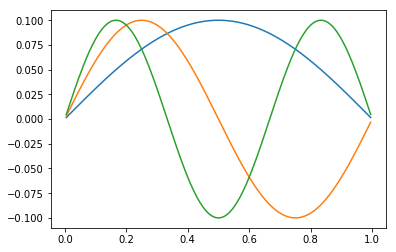

In [4]:
x=np.arange(1,N+1)*h
for i in np.arange(3):
    plt.plot(x,w[:,i])

At $t=0$, we can set the $a_k$ coefficients using $$u(x,t=0)=\sum_ka_kw_k(x)\,.$$  Although in this case, $\mathbf{M}$ is symmetric and the $\mathbf{w}$ vectors are thus orthogonal, in the general case $\mathbf{M}$ is not symmetric.  In that case you could multiply $u(x,t=0)$ by the inverse of the eigenvector matrix.

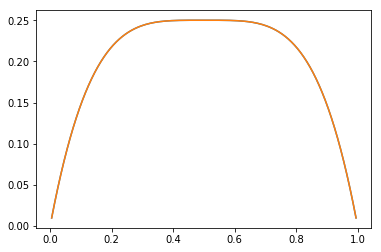

In [5]:
initial = (- (x - 0.5)**4 + 0.5**4) * 4.
winv=linalg.inv(w)
ak=winv.dot(initial)
plt.plot(x,initial)
plt.plot(x,w.dot(ak))

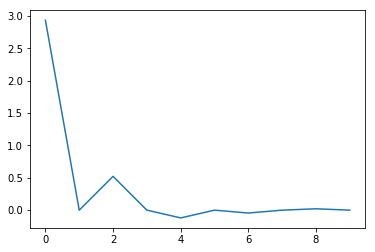

In [29]:
plt.plot(ak[:10])

We will assume that the spring starts at rest, which requires $b_k=0$.  Now we have enough to construct the motion of the string.

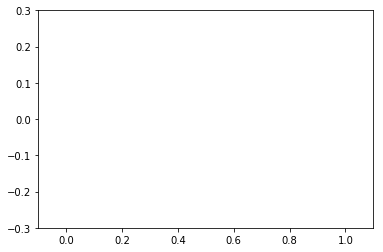

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.1, 1.1))
ax.set_ylim((- 0.3, 0.3))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

In [10]:
def frame(i):
        period =  2. * np.pi / om[0]
        t = np.float64(i) / np.float64(nframes) * period * 4
        coeffs = ak * np.cos(om * t)
        y = w.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [11]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nframes, interval=40, blit=True,
                               repeat_delay=2000)

HTML(anim.to_html5_video())

For a springy string, vibrations are a bit different.

In [12]:
q=40.
M[0,0]=2*c2+h**2*q
M[0,1]=-c2
M[-1,-2]=-c2
M[-1,-1]=2*c2+h**2*q
for i in np.arange(1,N-1):
    M[i,i-1]=-c2
    M[i,i]=2*c2+h**2*q
    M[i,i+1]=-c2
M/=h**2
om2,w=linalg.eig(M)
isort = np.argsort(om2)
om2=om2[isort]
w=w[:,isort]

In [13]:
om=np.sqrt(om2)
print om[:30]

[ 7.06182706  8.91488479 11.34944946 14.06633306 16.92965745 19.87568443
 22.87189462 25.90026824 28.95008433 32.01457094 35.0892278  38.17093058
 41.2574254  44.34702972 47.43844821 50.53065515 53.62281719 56.71424112
 59.80433777 62.89259651 65.97856693 69.06184535 72.14206494 75.21888811
 78.29200086 81.36110831 84.42593126 87.4862035  90.54166963 93.59208335]


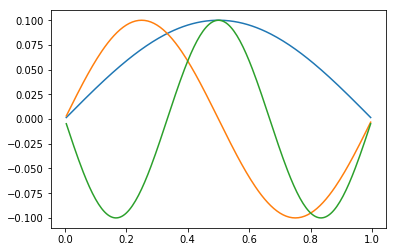

In [14]:
x=np.arange(1,N+1)*h
for i in np.arange(3):
    plt.plot(x,w[:,i])

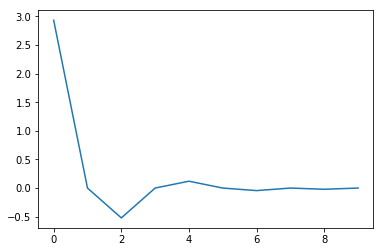

In [16]:
winv=linalg.inv(w)
ak=winv.dot(initial)
plt.plot(ak[:10])

In [17]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nframes, interval=40, blit=True,
                               repeat_delay=2000)

HTML(anim.to_html5_video())